<a href="https://colab.research.google.com/github/OseiasBeu/FormacaoMachineLearningAvancada/blob/main/Deep_Learning_Previsao_Com_Keras/curso_deep_learning_previs%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [32]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['font.size'] = 22
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Exploração

In [10]:
passageiros = pd.read_csv(r'https://raw.githubusercontent.com/OseiasBeu/FormacaoMachineLearningAvancada/main/Deep_Learning_Previsao_Com_Keras/Passageiros.csv')

In [11]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

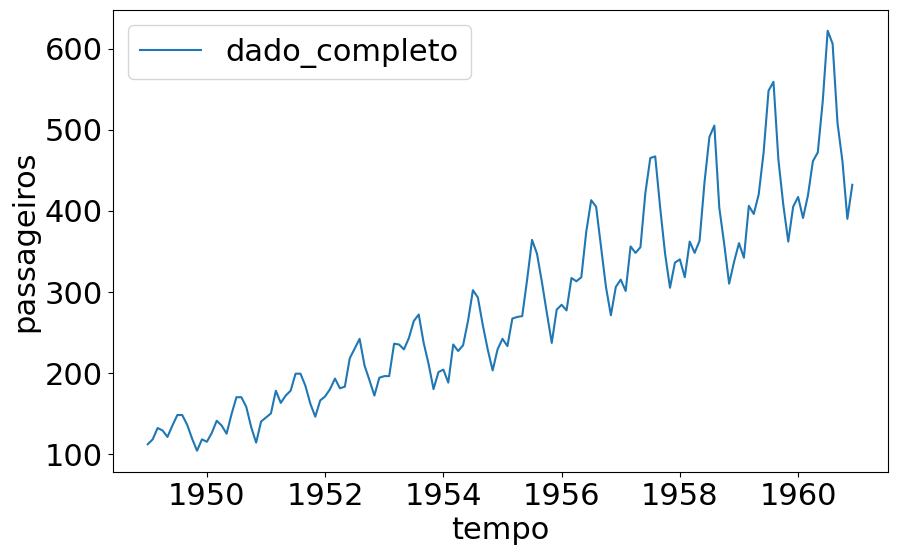

In [20]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros, label='dado_completo')

# Pré processamento

In [22]:
sc = StandardScaler()

In [23]:
sc.fit(passageiros)

StandardScaler()

In [24]:
dado_escalado = sc.transform(passageiros)

In [25]:
X = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

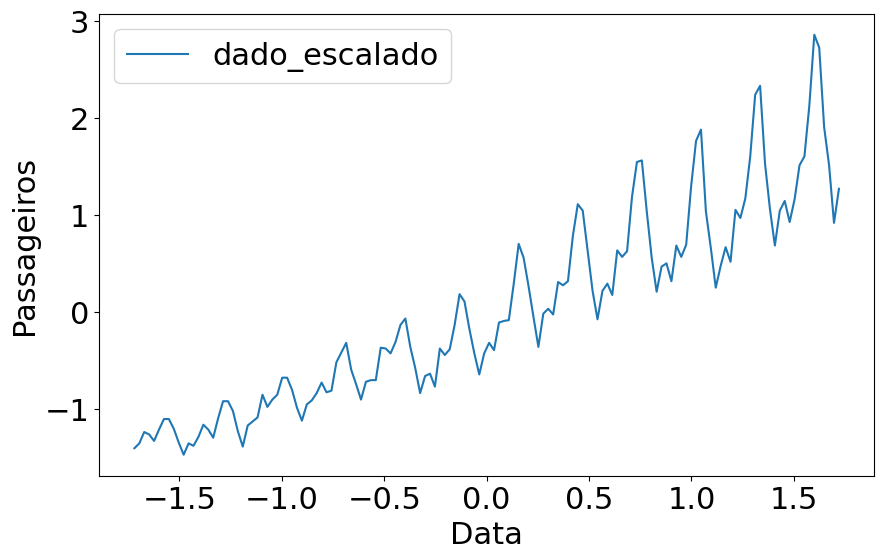

In [27]:
sns.lineplot(x=X, y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [28]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [29]:
xtreino = X[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste = X[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

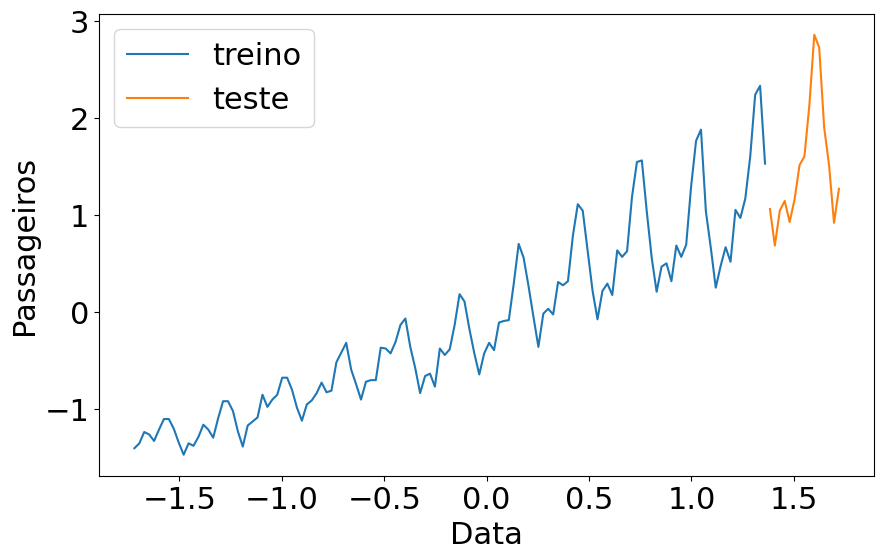

In [31]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')

plt.ylabel('Passageiros')
plt.xlabel('Data')

# Regressão linear

In [43]:
# y = ax +b
regressor = Sequential()
regressor.add(Dense(units=1,
                    input_dim=1,
                    kernel_initializer='Ones',
                    activation='linear',
                    use_bias=False
                    ))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
regressor.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
regressor.fit(xtreino, ytreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1241  


In [57]:
y_predict = regressor.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


Text(0.5, 0, 'Data')

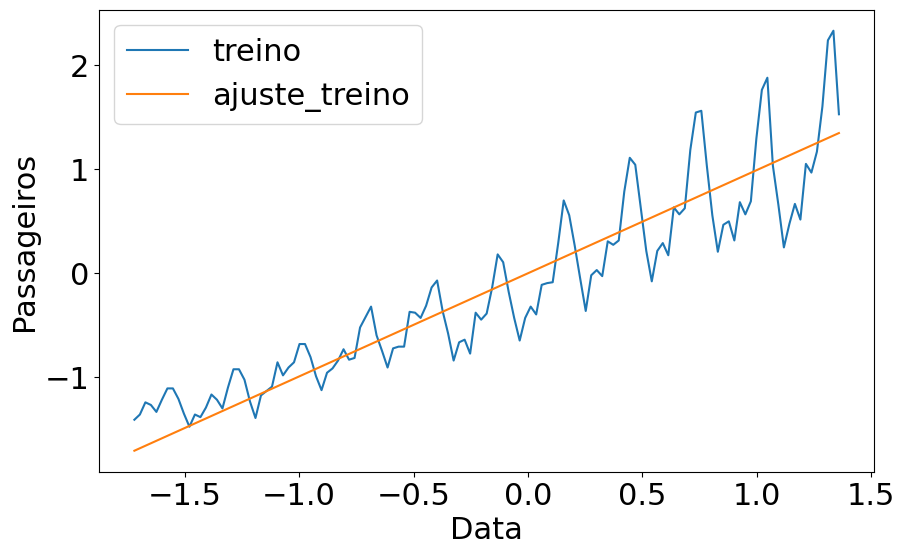

In [58]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

plt.ylabel('Passageiros')
plt.xlabel('Data')

In [61]:
d = {"tempo": xtreino,
     "passageiros": ytreino,
     "ajuste": y_predict[:,0]
     }
resultados = pd.DataFrame(data=d)

In [62]:
resultados

,tempo,passageiros,ajuste
0,-1.720064,-1.407779,-1.705526
1,-1.696007,-1.357590,-1.681673
2,-1.671950,-1.240483,-1.657819
3,-1.647894,-1.265578,-1.633966
4,-1.623837,-1.332496,-1.610112
...,...,...,...
124,1.262984,1.168570,1.252309
125,1.287041,1.603538,1.276163
126,1.311098,2.239260,1.300017
127,1.335155,2.331272,1.323870


In [65]:
resultado_transf = sc.inverse_transform(resultados[['tempo', 'ajuste']])

In [67]:
resultado_transf = pd.DataFrame(resultado_transf)

In [69]:
resultado_transf.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

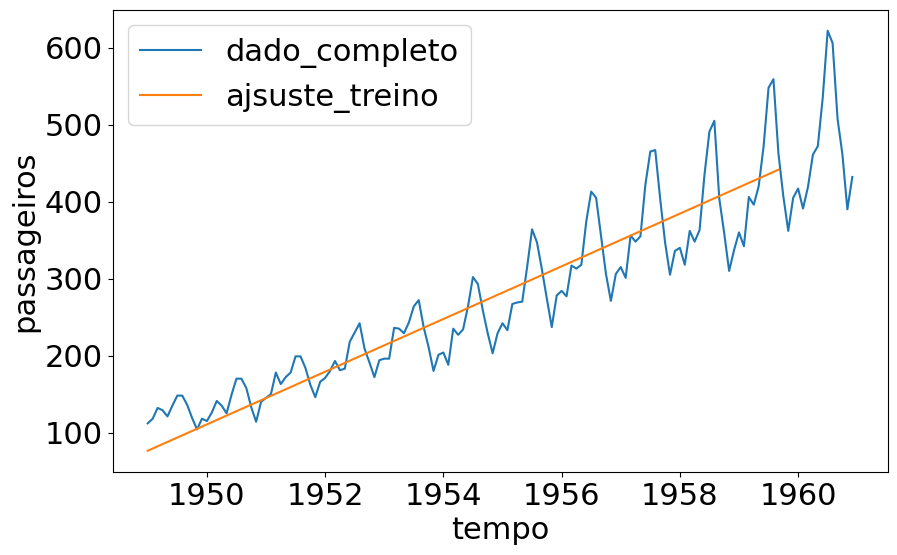

In [70]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf,label='ajsuste_treino')

In [71]:
y_predict_teste = regressor.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [72]:
d = {'tempo':xteste, 'passageiros':y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [73]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)


In [74]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)

In [75]:
resultado_transf_teste.columns = ['tempo', 'passageiros']

In [76]:
resultado_transf_teste

,tempo,passageiros
0,1959.750000,444.269330
1,1959.833333,447.120998
2,1959.916667,449.972651
3,1960.000000,452.824319
4,1960.083333,455.675987
5,1960.166667,458.527641
6,1960.250000,461.379323
7,1960.333333,464.230977
8,1960.416667,467.082630
9,1960.500000,469.934312


<Axes: xlabel='tempo', ylabel='passageiros'>

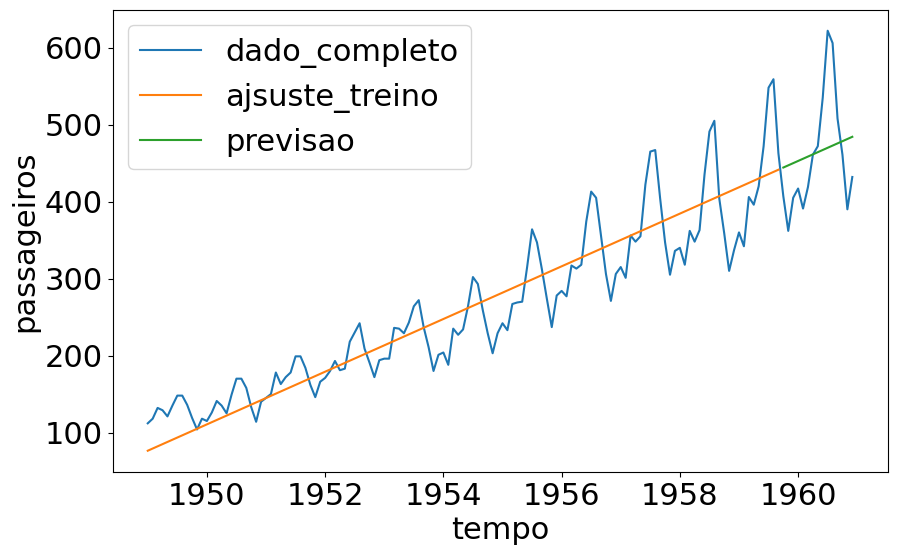

In [78]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf,label='ajsuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste,label='previsao')

In [79]:
# z = w1*x1+b

In [100]:
regressor2 = Sequential()

In [101]:
regressor2.add(Dense(units=8,
                    input_dim=1,
                    kernel_initializer='random_uniform',
                    activation='sigmoid',
                    use_bias=False
                    ))

regressor2.add(Dense(8,
                     kernel_initializer='random_uniform',
                     activation='sigmoid',
                     use_bias=False))

regressor2.add(Dense(1,
                     kernel_initializer='random_uniform',
                     activation='linear',
                     use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
regressor2.compile(optimizer='adam', loss='mean_squared_error')

In [103]:
regressor2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [108]:
regressor2.fit(xtreino, ytreino,epochs=500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6821 
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6210 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7145 
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6750 
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6712 
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7266 
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6476 
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7227 
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5936 
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7084 
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6861 
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6058 
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6460 
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6312 
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7411 
Epoch 16/500
5/5 ━━

In [109]:
y_predict = regressor2.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [110]:
y_predict_teste = regressor2.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Text(0.5, 0, 'Data')

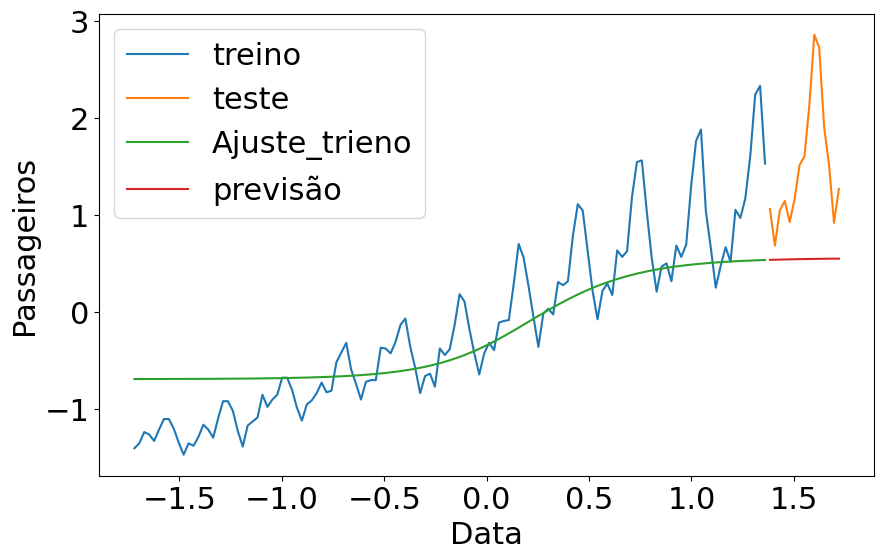

In [111]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='Ajuste_trieno')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')
plt.ylabel('Passageiros')
plt.xlabel('Data')